In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATOS TRABAJO N°1**

In [ ]:
antiguo = '/content/drive/MyDrive/SEMESTRE 2/Analítica/PROYECTO 2/modificada.csv'

In [ ]:
dv = pd.read_csv(antiguo)
dv.head(17)

,Region,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total Pais,-32.8,-35.0,-33.3,-34.0,-29.7,-31.1,-31.0,-29.7,-27.1,-28.1,-20.4,-21.7,-25.5
1,Región de Arica y Parinacota,-32.6,-37.6,-42.3,-19.7,-26.7,-26.8,-26.7,-33.5,-28.0,-25.5,-11.4,-29.6,-24.5
2,Región de Tarapacá,-39.1,-28.8,-32.8,-31.2,-35.9,-32.0,-31.1,-30.5,-25.4,-20.6,-30.7,-30.8,-34.5
3,Región de Antofagasta,-44.3,-40.5,-41.8,-45.6,-41.8,-42.0,-38.6,-45.6,-40.0,-42.4,-40.7,-31.2,-40.4
4,Región de Atacama,-39.3,-32.9,-37.0,-35.3,-28.0,-37.8,-39.0,-33.7,-37.7,-39.7,-29.3,-26.8,-34.4
5,Región de Coquimbo,-33.6,-34.4,-35.7,-37.9,-33.6,-34.6,-28.4,-34.8,-32.1,-28.2,-10.5,-29.6,-32.6
6,Región de Valparaíso,-37.8,-43.5,-38.4,-33.0,-27.2,-31.7,-33.0,-33.9,-30.1,-33.5,-22.0,-23.7,-22.9
7,Region Metropolitana de Santiago,-34.3,-37.2,-36.0,-38.1,-31.0,-32.6,-33.6,-31.5,-29.3,-29.6,-21.0,-21.4,-25.2
8,Región de Libertador Gral. Bernardo O'Higgins,-34.2,-25.3,-27.1,-31.0,-26.8,-30.6,-29.2,-17.6,-16.1,-19.0,-17.8,-31.0,-26.2
9,Región de Maule,-25.5,-24.0,-24.0,-25.6,-28.6,-26.7,-25.8,-27.0,-20.1,-22.4,-15.6,-14.7,-14.6


In [ ]:
# Limpiar los nombres de las columnas (si es necesario)
dv.columns = dv.columns.str.strip()

# Convertir los datos de los años a tipo numérico (por si vienen como texto)
for year in range(2010, 2023):
    dv[str(year)] = pd.to_numeric(dv[str(year)], errors='coerce')

# Calcular la mediana y la desviación estándar para todos los datos
mediana_general = dv.iloc[:, 1:].median().mean()  # Media de las medianas
desviacion_general = dv.iloc[:, 1:].std().mean()  # Media de las desviaciones estándar

# Mostrar los resultados generales
print("Mediana general de ingresos:", mediana_general)
print("Desviación estándar general de ingresos:", desviacion_general)

Mediana general de ingresos: -27.846153846153843
Desviación estándar general de ingresos: 7.123263735971293


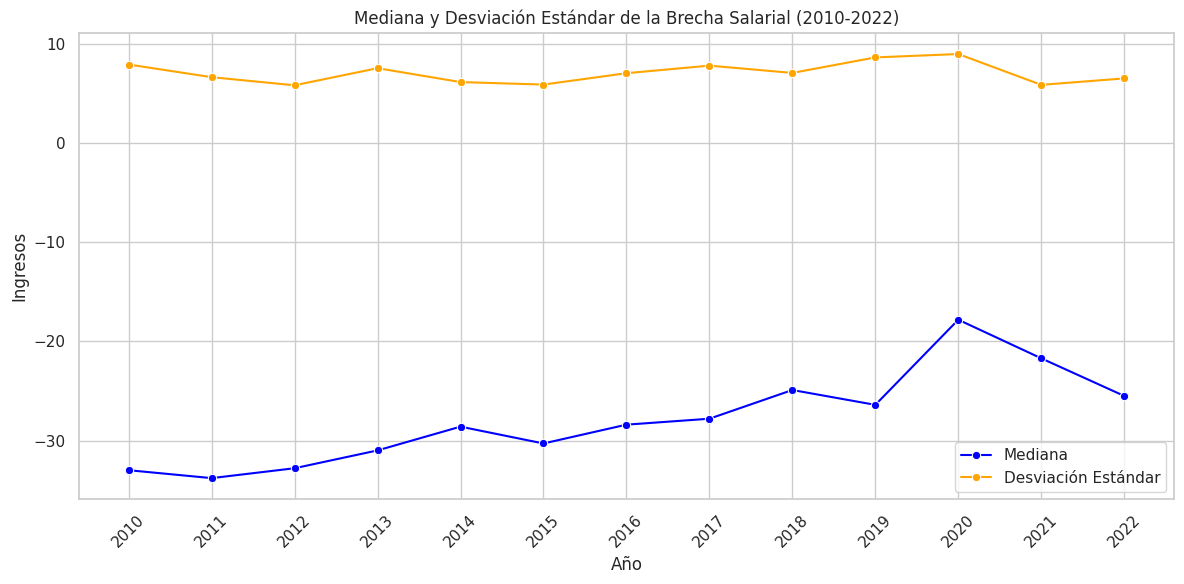

In [ ]:
# Limpiar los nombres de las columnas
dv.columns = dv.columns.str.strip()

# Convertir los datos de los años a tipo numérico
for year in range(2010, 2023):
    dv[str(year)] = pd.to_numeric(dv[str(year)], errors='coerce')

# Calcular la mediana y la desviación estándar para cada año
medianas = dv.iloc[:, 1:].median()
desviaciones = dv.iloc[:, 1:].std()

# Crear un DataFrame para las medianas y desviaciones
resultados = pd.DataFrame({
    'Año': medianas.index,
    'Mediana': medianas.values,
    'Desviación Estándar': desviaciones.values
})

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Graficar las medianas
sns.lineplot(x='Año', y='Mediana', data=resultados, marker='o', label='Mediana', color='blue')

# Graficar la desviación estándar
sns.lineplot(x='Año', y='Desviación Estándar', data=resultados, marker='o', label='Desviación Estándar', color='orange')

# Mejorar la presentación del gráfico
plt.title('Mediana y Desviación Estándar de la Brecha Salarial (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#BASE DE DATOS NUEVA

**NACIONAL**

In [ ]:
import pandas as pd

# Ruta al archivo Excel en Google Drive
ruta_excel = '/content/drive/MyDrive/SEMESTRE 2/Analítica/PROYECTO 2/Ingres.xlsx'

# Cargar la hoja "NACIONAL"
df = pd.read_excel(ruta_excel, sheet_name='NACIONAL')

# Verificar las primeras filas del DataFrame
df.head()


,Año,Ingreso mediano mensual Total ($),Ingreso mediano mensual Hombres ($),Ingreso mediano mensual Mujeres ($),Brecha de género\n (%)
0,2010,228275.554668,250244.666275,199863.214460,-20.132877
1,2011,251208.301744,299041.083012,209328.758108,-30.000000
2,2012,291307.989691,311398.195876,240000.000000,-22.928263
3,2013,300406.687754,350000.000000,250338.906462,-28.474598
4,2014,327438.589912,370000.000000,280000.000000,-24.324324


**PRUEBA DE MANN-WHITNEY U A NIVEL NACIONAL**





In [ ]:
# Limpiar los nombres de columnas quitando espacios en los extremos
df.columns = df.columns.str.strip()

# Acceder a las columnas
ingreso_hombres = df['Ingreso mediano mensual Hombres ($)']
ingreso_mujeres = df['Ingreso mediano mensual Mujeres ($)']


In [ ]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(ingreso_hombres, ingreso_mujeres, alternative='two-sided')

# Mostrar los resultados
print("Resultados de la prueba de Mann-Whitney U a nivel Nacional:")
print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretar el valor p
if p_value < 0.05:
    print("Hay diferencias significativas entre los ingresos de hombres y mujeres.")
else:
    print("No hay diferencias significativas entre los ingresos de hombres y mujeres.")


Resultados de la prueba de Mann-Whitney U a nivel Nacional:
Estadístico U: 128.5
Valor p: 0.02557016520633315
Hay diferencias significativas entre los ingresos de hombres y mujeres.


**MEDIDAS DE TENDENCIA CENTRAL**

In [ ]:
# Convertir a numérico, forzando errores a NaN
df['Ingreso mediano mensual Hombres ($)'] = pd.to_numeric(df['Ingreso mediano mensual Hombres ($)'], errors='coerce')
df['Ingreso mediano mensual Mujeres ($)'] = pd.to_numeric(df['Ingreso mediano mensual Mujeres ($)'], errors='coerce')

In [ ]:
# Calcular medidas para hombres
media_hombres = df['Ingreso mediano mensual Hombres ($)'].mean()
mediana_hombres = df['Ingreso mediano mensual Hombres ($)'].median()
desviacion_estandar_hombres = df['Ingreso mediano mensual Hombres ($)'].std()
rango_hombres = df['Ingreso mediano mensual Hombres ($)'].max() - df['Ingreso mediano mensual Hombres ($)'].min()
cuartiles_hombres = df['Ingreso mediano mensual Hombres ($)'].quantile([0.25, 0.5, 0.75])
percentiles_hombres = df['Ingreso mediano mensual Hombres ($)'].quantile([0.10, 0.90])

In [ ]:
# Mostrar resultados
print("Medidas de tendencia central y dispersión para Hombres:")
print(f"Media: {media_hombres:.2f}")
print(f"Mediana: {mediana_hombres:.2f}")
print(f"Desviación Estándar: {desviacion_estandar_hombres:.2f}")
print(f"Rango: {rango_hombres:.2f}")
print(f"Cuartiles:\n{cuartiles_hombres}")
print(f"Percentiles (10 y 90):\n{percentiles_hombres}")

Medidas de tendencia central y dispersión para Hombres:
Media: 400029.41
Mediana: 400000.00
Desviación Estándar: 86551.60
Rango: 322723.38
Cuartiles:
0.25    350000.000000
0.50    400000.000000
0.75    449652.341864
Name: Ingreso mediano mensual Hombres ($), dtype: float64
Percentiles (10 y 90):
0.1    301512.505585
0.9    490118.443316
Name: Ingreso mediano mensual Hombres ($), dtype: float64


In [ ]:
# Calcular medidas para mujeres
media_mujeres = df['Ingreso mediano mensual Mujeres ($)'].mean()
mediana_mujeres = df['Ingreso mediano mensual Mujeres ($)'].median()
desviacion_estandar_mujeres = df['Ingreso mediano mensual Mujeres ($)'].std()
rango_mujeres = df['Ingreso mediano mensual Mujeres ($)'].max() - df['Ingreso mediano mensual Mujeres ($)'].min()
cuartiles_mujeres = df['Ingreso mediano mensual Mujeres ($)'].quantile([0.25, 0.5, 0.75])
percentiles_mujeres = df['Ingreso mediano mensual Mujeres ($)'].quantile([0.10, 0.90])

In [ ]:
print("\nMedidas de tendencia central y dispersión para Mujeres:")
print(f"Media: {media_mujeres:.2f}")
print(f"Mediana: {mediana_mujeres:.2f}")
print(f"Desviación Estándar: {desviacion_estandar_mujeres:.2f}")
print(f"Rango: {rango_mujeres:.2f}")
print(f"Cuartiles:\n{cuartiles_mujeres}")
print(f"Percentiles (10 y 90):\n{percentiles_mujeres}")


Medidas de tendencia central y dispersión para Mujeres:
Media: 313067.73
Mediana: 300500.61
Desviación Estándar: 78289.86
Rango: 254860.16
Cuartiles:
0.25    250338.906462
0.50    300500.614790
0.75    352864.659456
Name: Ingreso mediano mensual Mujeres ($), dtype: float64
Percentiles (10 y 90):
0.1    215463.006487
0.9    404278.151638
Name: Ingreso mediano mensual Mujeres ($), dtype: float64


**VISUALIZACIÓN**

In [ ]:
# Visualización de histogramas
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

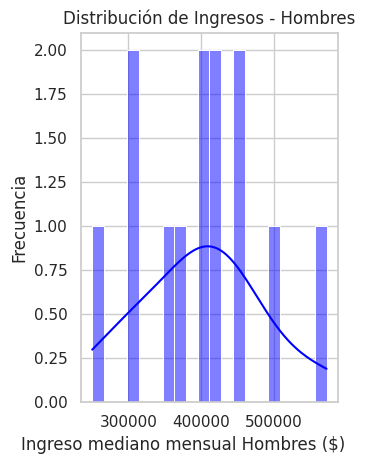

In [ ]:
# Histograma para hombres
plt.subplot(1, 2, 1)
sns.histplot(df['Ingreso mediano mensual Hombres ($)'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribución de Ingresos - Hombres')
plt.xlabel('Ingreso mediano mensual Hombres ($)          ')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

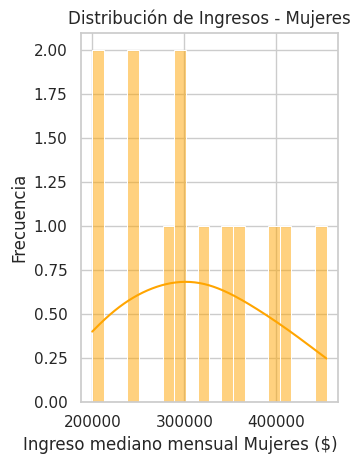

In [ ]:
# Histograma para mujeres
plt.subplot(1, 2, 2)
sns.histplot(df['Ingreso mediano mensual Mujeres ($)'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribución de Ingresos - Mujeres')
plt.xlabel('Ingreso mediano mensual Mujeres ($)           ')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

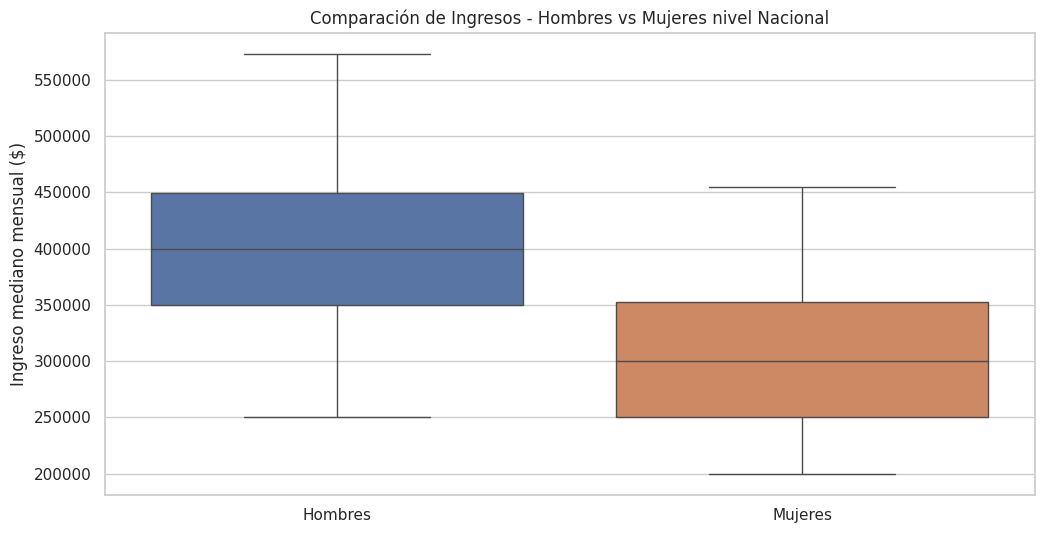

In [ ]:
# Visualización de boxplots
plt.figure(figsize=(12, 6))

# Boxplot para comparar ingresos por género
sns.boxplot(data=df[['Ingreso mediano mensual Hombres ($)', 'Ingreso mediano mensual Mujeres ($)']].dropna())
plt.title('Comparación de Ingresos - Hombres vs Mujeres nivel Nacional')
plt.ylabel('Ingreso mediano mensual ($)')
plt.xticks(ticks=[0, 1], labels=['Hombres', 'Mujeres'])

plt.show()

**REGIONAL**

In [ ]:
# Cargar la hoja "REGIONAL"
dA = pd.read_excel(ruta_excel, sheet_name='REGIONAL')

# Verificar las primeras filas del DataFrame
dA.head()


,Año,Región,Código región,Ingreso mediano mensual Total ($),Ingreso mediano mensual Hombres ($),Ingreso mediano mensual Mujeres ($),Brecha de género\n (%)
0,2010,Arica y Parinacota,15,200195.733020,250244.666275,160156.586416,-36.000000
1,2011,Arica y Parinacota,15,213024.639879,261600.404307,160260.333539,-38.738499
2,2012,Arica y Parinacota,15,243397.000697,301353.092784,181011.795061,-39.933653
3,2013,Arica y Parinacota,15,260233.641122,300406.687754,199244.740155,-33.674999
4,2014,Arica y Parinacota,15,299943.746484,321315.854737,224957.809863,-29.988575


**PRUEBA DE MANN-WHITNEY U A NIVEL REGIONAL**

In [ ]:
# Limpiar los nombres de columnas quitando espacios en los extremos
dA.columns = dA.columns.str.strip()

# Acceder a las columnas
ingreso_hombres = dA['Ingreso mediano mensual Hombres ($)']
ingreso_mujeres = dA['Ingreso mediano mensual Mujeres ($)']


In [ ]:
# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(ingreso_hombres, ingreso_mujeres, alternative='two-sided')

# Mostrar los resultados
print("Resultados de la prueba de Mann-Whitney U a nivel Regional:")
print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretar el valor p
if p_value < 0.05:
    print("Hay diferencias significativas entre los ingresos de hombres y mujeres.")
else:
    print("No hay diferencias significativas entre los ingresos de hombres y mujeres.")

Resultados de la prueba de Mann-Whitney U a nivel Regional:
Estadístico U: 32629.5
Valor p: 2.9718274249993378e-19
Hay diferencias significativas entre los ingresos de hombres y mujeres.


*Prueba de Mann-Whitney U para Tarapacá*

In [ ]:
# Limpiar los nombres de columnas quitando espacios en los extremos
dA.columns = dA.columns.str.strip()

# Filtrar los datos solo para la región de Tarapacá
dA_tarapaca = dA[dA['Región'] == 'Tarapacá']

# Acceder a las columnas
ingreso_hombres = dA_tarapaca['Ingreso mediano mensual Hombres ($)']
ingreso_mujeres = dA_tarapaca['Ingreso mediano mensual Mujeres ($)']

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(ingreso_hombres.dropna(), ingreso_mujeres.dropna(), alternative='two-sided')

# Mostrar los resultados
print("Resultados de la prueba de Mann-Whitney U a nivel Regional (Tarapacá):")
print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretar el valor p
if p_value < 0.05:
    print("Hay diferencias significativas entre los ingresos de hombres y mujeres en Tarapacá.")
else:
    print("No hay diferencias significativas entre los ingresos de hombres y mujeres en Tarapacá.")

Resultados de la prueba de Mann-Whitney U a nivel Regional (Tarapacá):
Estadístico U: 153.0
Valor p: 0.0004881436339410853
Hay diferencias significativas entre los ingresos de hombres y mujeres en Tarapacá.


**PRUEBA TEST T**


In [ ]:
# Extraer los datos de 2010
hombres = dA.loc[dA['Año'] == 2010, 'Ingreso mediano mensual Hombres ($)'].dropna().values  # Ingresos de hombres en 2010
mujeres = dA.loc[dA['Año'] == 2010, 'Ingreso mediano mensual Mujeres ($)'].dropna().values  # Ingresos de mujeres en 2010

# Realizar la prueba t de Welch (varianzas desiguales)
stat, p_value = ttest_ind(hombres, mujeres, equal_var=False)  # Usar equal_var=False para la prueba t de Welch

# Mostrar los resultados
print('Prueba TEST-T a nivel Regional año 2010')
print('Estadístico t:', stat)
print('Valor p:', p_value)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Prueba TEST-T a nivel Regional año 2010
Estadístico t: 4.237157996436817
Valor p: 0.0003901234541706684
Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


In [ ]:
# Extraer los datos de 2022
hombres = dA.loc[dA['Año'] == 2020, 'Ingreso mediano mensual Hombres ($)'].dropna().values  # Ingresos de hombres en 2020
mujeres = dA.loc[dA['Año'] == 2020, 'Ingreso mediano mensual Mujeres ($)'].dropna().values  # Ingresos de mujeres en 2020

# Realizar la prueba t de Welch (varianzas desiguales)
stat, p_value = ttest_ind(hombres, mujeres, equal_var=False)  # Usar equal_var=False para la prueba t de Welch

# Mostrar los resultados
print('Prueba TEST-T a nivel Regional año 2020')
print('Estadístico t:', stat)
print('Valor p:', p_value)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Prueba TEST-T a nivel Regional año 2020
Estadístico t: 3.6846267272978093
Valor p: 0.0013939712190319514
Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


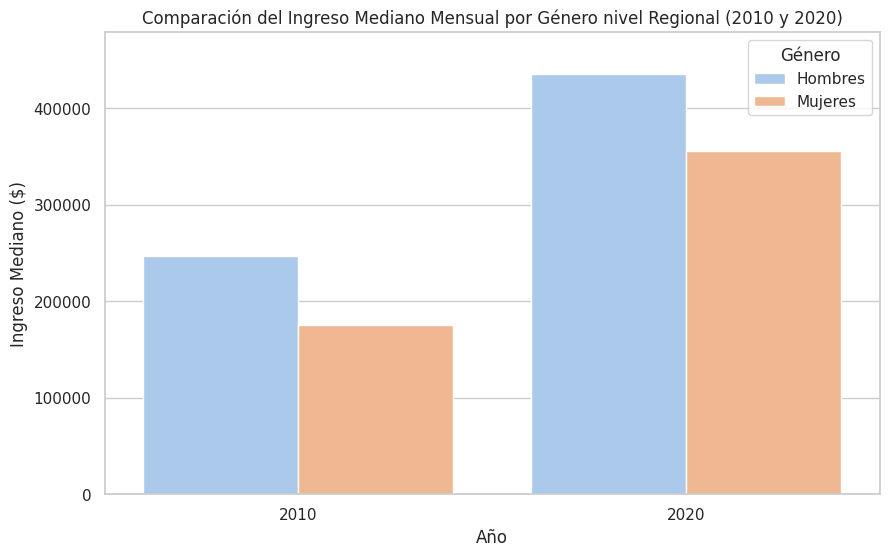

In [ ]:
# Convertir a numérico, forzando errores a NaN
dA['Ingreso mediano mensual Hombres ($)'] = pd.to_numeric(dA['Ingreso mediano mensual Hombres ($)'], errors='coerce')
dA['Ingreso mediano mensual Mujeres ($)'] = pd.to_numeric(dA['Ingreso mediano mensual Mujeres ($)'], errors='coerce')

# Crear un nuevo DataFrame para los ingresos de 2020 y 2022
ingresos = {
    'Año': [],
    'Grupo': [],
    'Ingreso mediano ($)': []
}

# Extraer datos para 2010 y 2020
for year in [2010, 2020]:
    ingresos['Año'].extend([year, year])
    ingresos['Grupo'].extend(['Hombres', 'Mujeres'])
    ingresos['Ingreso mediano ($)'].extend([
        dA.loc[dA['Año'] == year, 'Ingreso mediano mensual Hombres ($)'].median(),
        dA.loc[dA['Año'] == year, 'Ingreso mediano mensual Mujeres ($)'].median()
    ])

# Convertir a DataFrame
dA_ingresos = pd.DataFrame(ingresos)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Ingreso mediano ($)', hue='Grupo', data=dA_ingresos, palette='pastel')
plt.title('Comparación del Ingreso Mediano Mensual por Género nivel Regional (2010 y 2020)')
plt.ylabel('Ingreso Mediano ($)')
plt.xlabel('Año')
plt.ylim(0, dA_ingresos['Ingreso mediano ($)'].max() * 1.1)  # Ajustar límite superior
plt.legend(title='Género')
plt.show()

**MEDIDAS DE TENDENCIA CENTRAL**

In [ ]:
# Calcular medidas para hombres
media_hombres = dA['Ingreso mediano mensual Hombres ($)'].mean()
mediana_hombres = dA['Ingreso mediano mensual Hombres ($)'].median()
desviacion_estandar_hombres = dA['Ingreso mediano mensual Hombres ($)'].std()
rango_hombres = dA['Ingreso mediano mensual Hombres ($)'].max() - dA['Ingreso mediano mensual Hombres ($)'].min()
cuartiles_hombres = dA['Ingreso mediano mensual Hombres ($)'].quantile([0.25, 0.5, 0.75])
percentiles_hombres = dA['Ingreso mediano mensual Hombres ($)'].quantile([0.10, 0.90])

# Mostrar resultados
print("Medidas de tendencia central y dispersión para Hombres:")
print(f"Media: {media_hombres:.2f}")
print(f"Mediana: {mediana_hombres:.2f}")
print(f"Desviación Estándar: {desviacion_estandar_hombres:.2f}")
print(f"Rango: {rango_hombres:.2f}")
print(f"Cuartiles:\n{cuartiles_hombres}")
print(f"Percentiles (10 y 90):\n{percentiles_hombres}")


Medidas de tendencia central y dispersión para Hombres:
Media: 401257.93
Mediana: 400000.00
Desviación Estándar: 116131.52
Rango: 612289.16
Cuartiles:
0.25    318532.087108
0.50    400000.000000
0.75    463860.333249
Name: Ingreso mediano mensual Hombres ($), dtype: float64
Percentiles (10 y 90):
0.1    251184.084416
0.9    546868.181854
Name: Ingreso mediano mensual Hombres ($), dtype: float64


In [ ]:
# Calcular medidas para mujeres
media_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].mean()
mediana_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].median()
desviacion_estandar_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].std()
rango_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].max() - dA['Ingreso mediano mensual Mujeres ($)'].min()
cuartiles_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].quantile([0.25, 0.5, 0.75])
percentiles_mujeres = dA['Ingreso mediano mensual Mujeres ($)'].quantile([0.10, 0.90])

print("\nMedidas de tendencia central y dispersión para Mujeres:")
print(f"Media: {media_mujeres:.2f}")
print(f"Mediana: {mediana_mujeres:.2f}")
print(f"Desviación Estándar: {desviacion_estandar_mujeres:.2f}")
print(f"Rango: {rango_mujeres:.2f}")
print(f"Cuartiles:\n{cuartiles_mujeres}")
print(f"Percentiles (10 y 90):\n{percentiles_mujeres}")


Medidas de tendencia central y dispersión para Mujeres:
Media: 301016.83
Mediana: 300000.00
Desviación Estándar: 86488.18
Rango: 365957.42
Cuartiles:
0.25    230822.946279
0.50    300000.000000
0.75    359104.033911
Name: Ingreso mediano mensual Mujeres ($), dtype: float64
Percentiles (10 y 90):
0.1    190885.491229
0.9    403586.060624
Name: Ingreso mediano mensual Mujeres ($), dtype: float64


**VISUALIZACIONES**

In [ ]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

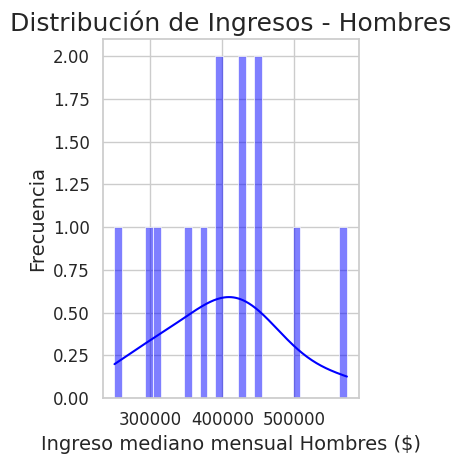

In [ ]:
# Histograma para hombres
plt.subplot(1, 2, 1)
sns.histplot(df['Ingreso mediano mensual Hombres ($)'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribución de Ingresos - Hombres', fontsize=18)
plt.xlabel('Ingreso mediano mensual Hombres ($)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

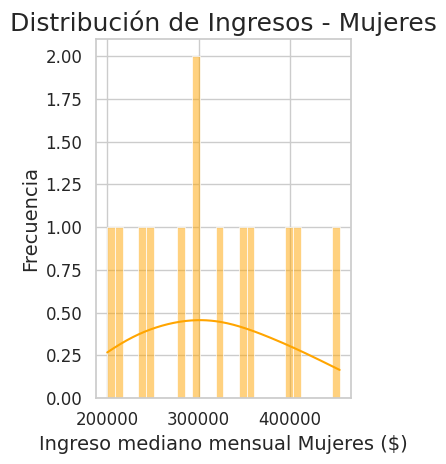

In [ ]:
# Histograma para mujeres
plt.subplot(1, 2, 2)
sns.histplot(df['Ingreso mediano mensual Mujeres ($)'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribución de Ingresos - Mujeres', fontsize=18)
plt.xlabel('Ingreso mediano mensual Mujeres ($)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

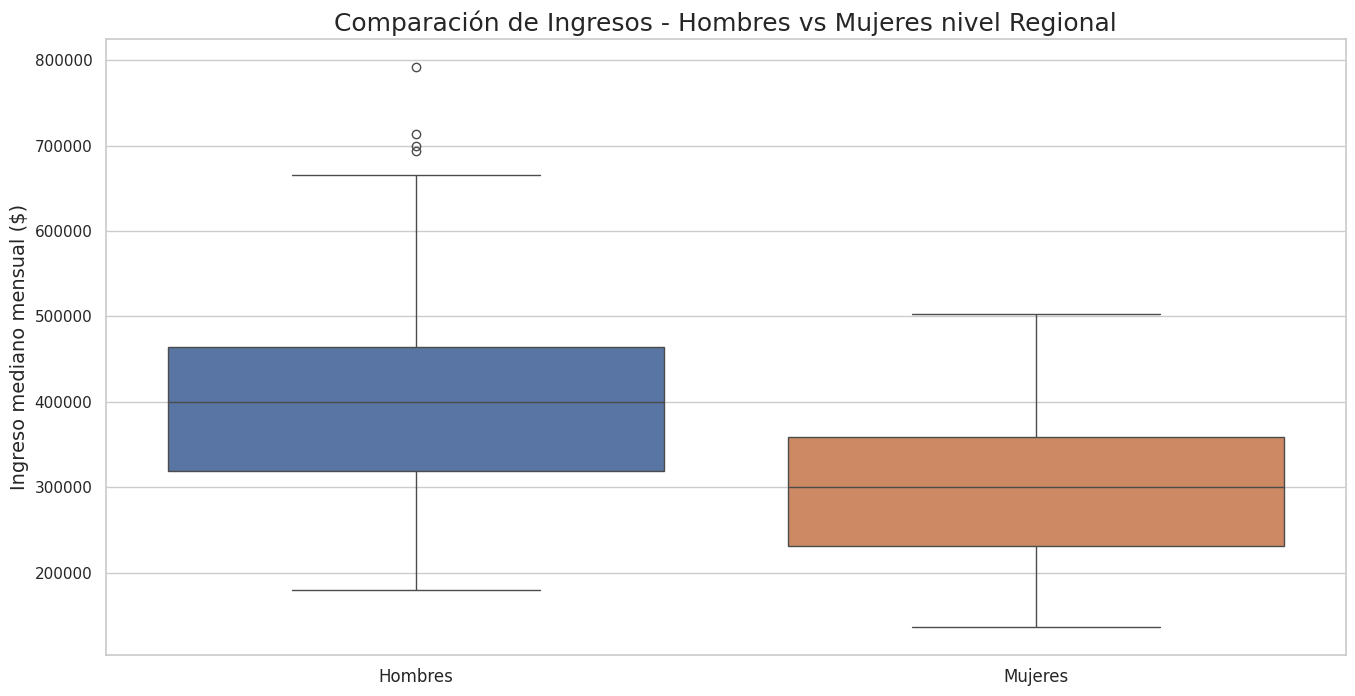

In [ ]:
# Visualización de boxplots
plt.figure(figsize=(16, 8))  # Aumentar el tamaño del boxplot

# Boxplot para comparar ingresos por género
sns.boxplot(data=dA[['Ingreso mediano mensual Hombres ($)', 'Ingreso mediano mensual Mujeres ($)']].dropna())
plt.title('Comparación de Ingresos - Hombres vs Mujeres nivel Regional', fontsize=18)
plt.ylabel('Ingreso mediano mensual ($)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Hombres', 'Mujeres'], fontsize=12)

plt.show()